In [1]:
#!/usr/bin/env python
##############################################
# Gabor filter, multiple filters in one. Generate fiter bank.
# ref: https://www.youtube.com/watch?v=QEz4bG9P3Qs
"""
ksize Size of the filter returned.
sigma Standard deviation of the gaussian envelope.
theta Orientation of the normal to the parallel stripes of a Gabor function.
lambda Wavelength of the sinusoidal factor.
gamma Spatial aspect ratio.
psi Phase offset.
ktype Type of filter coefficients. It can be CV_32F or CV_64F.
indicates the type and range of values that each pixel in the Gabor kernel can hold.
Basically float32 or float64
"""

# Previously made 24 filters (6 locations, 4 orientations at each location). Generated the filters in a loop, and applied 
# them iteratively. The neuronal rsps were summed and plotted. Now, generate filters separately, sum and plot result to 
# confirm the loop generation was correct.

import numpy as np
import cv2
import matplotlib.pyplot as plt

(128, 128)


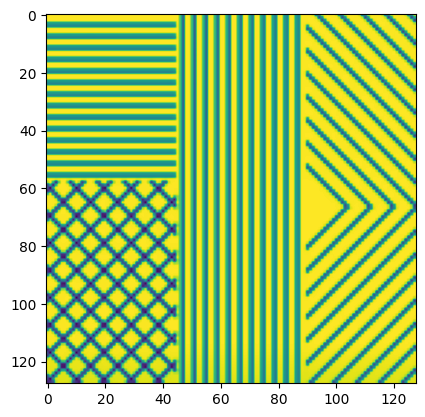

In [2]:
# Read image 
img = cv2.imread('/src/v1/artificial_patterns.png', cv2.IMREAD_GRAYSCALE)
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized
img = image_resize(img, height = 128)  # Resize image
img = img[:,23:151]
print(img.shape)
ksize = min(img.shape)
plt.imshow(img)

['filter', '128', '16', '2.356194490192345', '15.707963267948966', '0.7853981633974483', '0']
ksize 128
sigma 16.0
theta 2.356194490192345
lamda 15.707963267948966
gamma 0.7853981633974483
phi 0.0


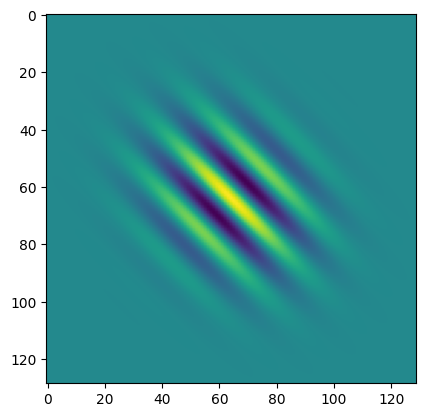

In [3]:
# Construct parameter dict
# Future filters are roughly based on this one... (sigma 16 -> 8)
file_name = 'filter_128_16_2.356194490192345_15.707963267948966_0.7853981633974483_0.jpg'
def parse_gabor_param(file_name):
    print(file_name[:-4].split('_'))
    param_dict = {}
    now_params = file_name[:-4].split('_')
    ksize = int(now_params[1])
    param_dict['ksize'] = ksize
    now_sigma = float(now_params[2])
    param_dict['sigma'] = now_sigma
    now_theta = float(now_params[3])
    param_dict['theta'] = now_theta
    now_lamda = float(now_params[4])
    param_dict['lamda'] = now_lamda
    now_gamma = float(now_params[5])
    param_dict['gamma'] = now_gamma
    phi = float(now_params[6])
    param_dict['phi'] = phi
    kernel = cv2.getGaborKernel((ksize, ksize), now_sigma, now_theta, now_lamda, now_gamma, phi, ktype=cv2.CV_32F)
    return kernel, param_dict
GF, param_dict = parse_gabor_param(file_name)
plt.imshow(GF)
for k in param_dict.keys():
    print(k, param_dict[k])
# like the look of this one... use it in 4 directions...    

# changed sigma not sure if was necessary

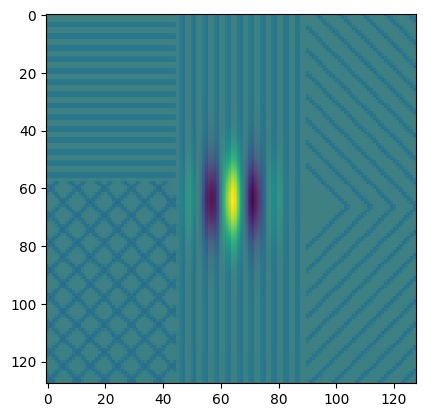

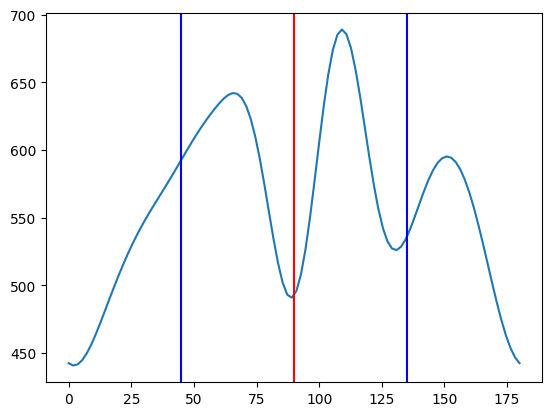

In [4]:
# view the behavior of this filter when the RF is at the center

ksize = param_dict['ksize']
theta = np.linspace(0, np.pi, 100)
sigma = 8
# sigma = param_dict['sigma']
lamda = param_dict['lamda']
gamma = param_dict['gamma']
phi = param_dict['phi']

k_collection = []
param_collection = {}

for k in param_dict.keys():
    param_collection[k] = []

for t in theta:
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, t, lamda, gamma, phi, ktype=cv2.CV_32F)
    
    param_collection['ksize'].append(ksize)
    param_collection['sigma'].append(sigma)
    param_collection['theta'].append(t)
    param_collection['lamda'].append(lamda)
    param_collection['gamma'].append(gamma)
    param_collection['phi'].append(phi)
    k_collection.append(kernel[:ksize,:ksize])

thetas = np.array(param_collection['theta'])

n_response = []
if_plt = True
for k in k_collection:
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k)
    fimg = cv2.filter2D(img, cv2.CV_8UC3, k)
    n_response.append(np.sum(img*k))
    # plt.figure()
    # plt.imshow(k)
    # plt.figure()
    # plt.imshow(fimg)
plt.imshow(img, interpolation='none', alpha=0.1)
plt.figure()
plt.scatter(thetas*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 90, color = 'r')
plt.axvline(x = 135, color = 'b')




Shift the kernel to target the upper right corner of the image...

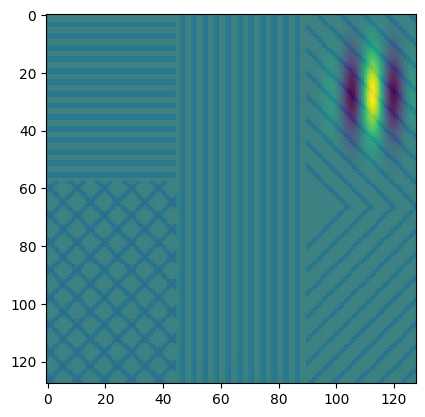

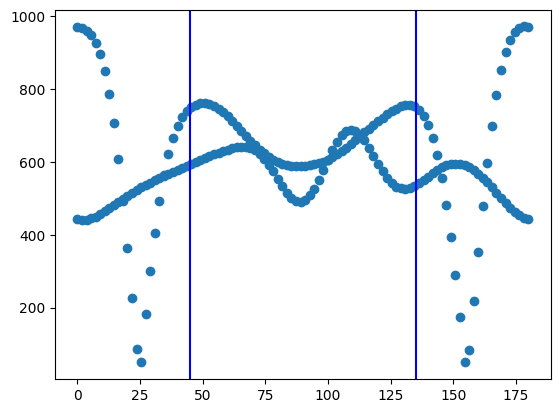

In [5]:
# this case do NOT reset response list
# n_response = []
if_plt = True
for k in k_collection:
    k_shifted = cv2.getRectSubPix(k, (128,128), (15, 100))
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k_shifted)
    # fimg = cv2.filter2D(img, cv2.CV_8UC3, k_shifted)
    n_response.append(np.sum(img*k_shifted))
plt.imshow(img, interpolation='none', alpha=0.1)
thetas = np.append(thetas, np.array(param_collection['theta']))        
plt.figure()
plt.scatter(thetas*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 90, color = 'r')
plt.axvline(x = 135, color = 'b')

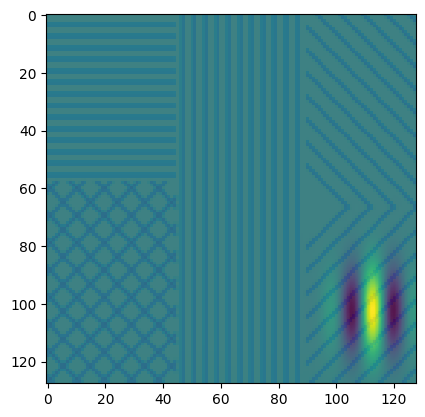

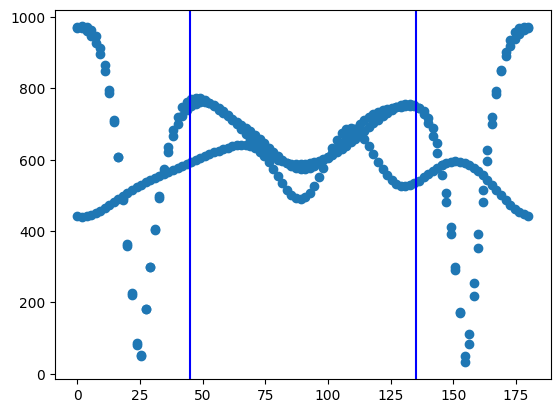

In [6]:
# n_response = []
if_plt = True
for k in k_collection:
    k_shifted = cv2.getRectSubPix(k, (128,128), (15, 25)) 
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k_shifted)
    # fimg = cv2.filter2D(img, cv2.CV_8UC3, k_shifted)
    n_response.append(np.sum(img*k_shifted))
plt.imshow(img, interpolation='none', alpha=0.1)
           
thetas = np.append(thetas, np.array(param_collection['theta']))        
plt.figure()
plt.scatter(thetas*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 90, color = 'r')
plt.axvline(x = 135, color = 'b')


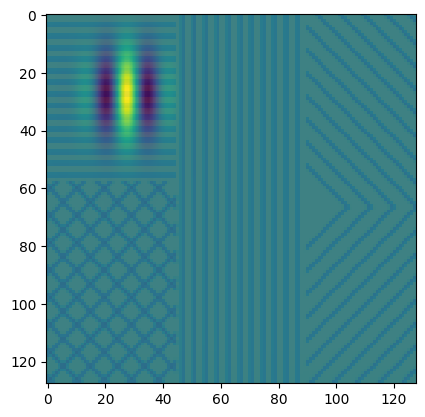

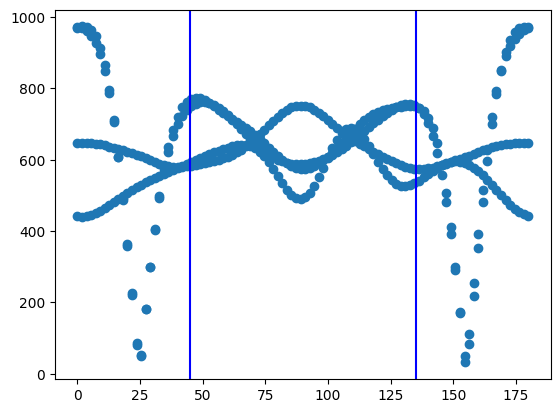

In [7]:
# n_response = []
if_plt = True
for k in k_collection:
    k_shifted = cv2.getRectSubPix(k, (128,128), (100, 100))
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k_shifted)
    # fimg = cv2.filter2D(img, cv2.CV_8UC3, k_shifted)
    n_response.append(np.sum(img*k_shifted))
plt.imshow(img, interpolation='none', alpha=0.1)
           
thetas = np.append(thetas, np.array(param_collection['theta']))        
plt.figure()
plt.scatter(thetas*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 90, color = 'r')
plt.axvline(x = 135, color = 'b')

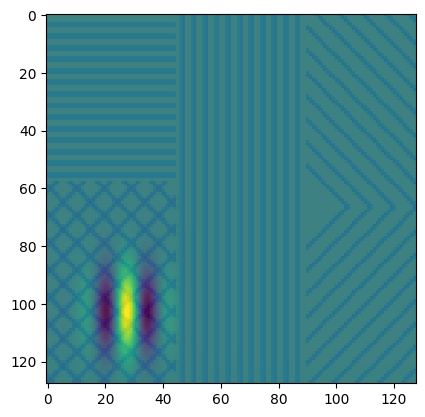

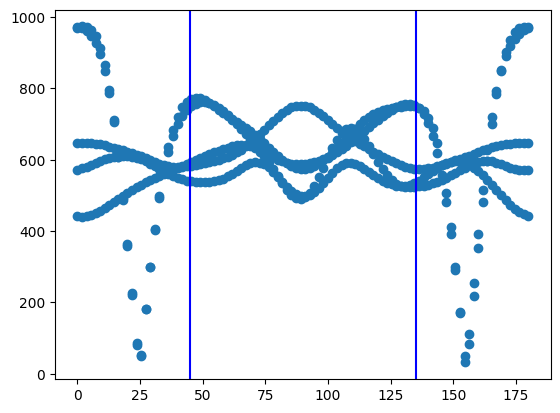

In [8]:
# n_response = []
if_plt = True
for k in k_collection:
    k_shifted = cv2.getRectSubPix(k, (128,128), (100, 25))
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k_shifted)
    # fimg = cv2.filter2D(img, cv2.CV_8UC3, k_shifted)
    n_response.append(np.sum(img*k_shifted))
plt.imshow(img, interpolation='none', alpha=0.1)
           
thetas = np.append(thetas, np.array(param_collection['theta']))        
plt.figure()
plt.scatter(thetas*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 90, color = 'r')
plt.axvline(x = 135, color = 'b')

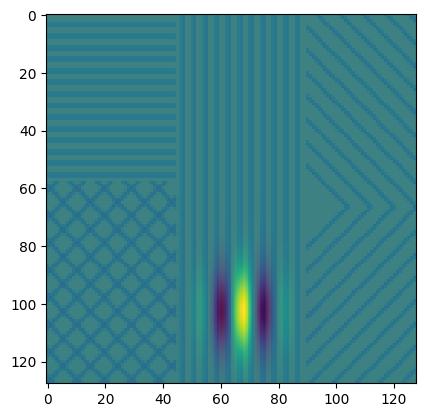

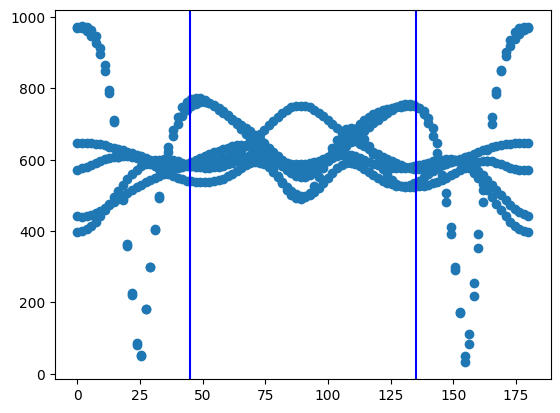

In [9]:
# n_response = []
if_plt = True
for k in k_collection:
    k_shifted = cv2.getRectSubPix(k, (128,128), (60, 25))
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k_shifted)
    # fimg = cv2.filter2D(img, cv2.CV_8UC3, k_shifted)
    n_response.append(np.sum(img*k_shifted))
plt.imshow(img, interpolation='none', alpha=0.1)
           
thetas = np.append(thetas, np.array(param_collection['theta']))        
plt.figure()
plt.scatter(thetas*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 90, color = 'r')
plt.axvline(x = 135, color = 'b')

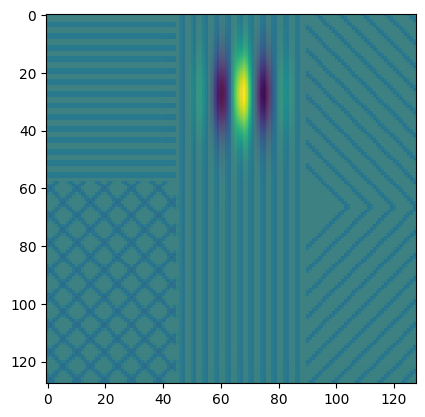

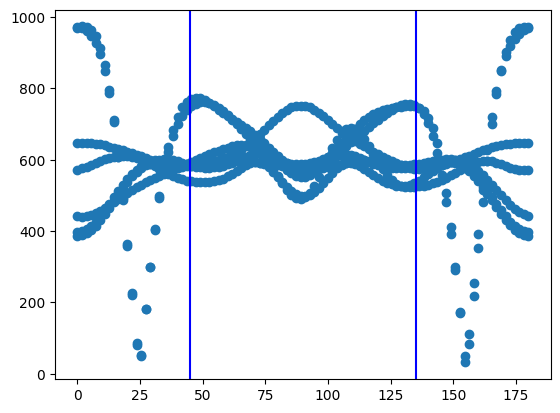

In [10]:
# n_response = []
if_plt = True
for k in k_collection:
    k_shifted = cv2.getRectSubPix(k, (128,128), (60, 100))
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k_shifted)
    # fimg = cv2.filter2D(img, cv2.CV_8UC3, k_shifted)
    n_response.append(np.sum(img*k_shifted))
plt.imshow(img, interpolation='none', alpha=0.1)
           
thetas = np.append(thetas, np.array(param_collection['theta']))        
plt.figure()
plt.scatter(thetas*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 90, color = 'r')
plt.axvline(x = 135, color = 'b')